In [1]:
# 📓 Customer Retention Analysis: 04_ab_testing.ipynb

## 1. Imports
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

sns.set(style="whitegrid")
np.random.seed(42)

## 2. Simulate A/B Test Results
# A: Reminder Email — assumed 30% retention
# B: ₹100 Coupon — assumed 50% retention

group_A = np.random.choice([1, 0], size=50, p=[0.30, 0.70])
group_B = np.random.choice([1, 0], size=50, p=[0.50, 0.50])

# Create a DataFrame
ab_df = pd.DataFrame({
    "Campaign": ["Reminder Email"] * 50 + ["₹100 Coupon"] * 50,
    "Returned": np.concatenate([group_A, group_B])
})


In [3]:

## 3. Retention Rates by Campaign
summary = ab_df.groupby("Campaign")["Returned"].agg(["sum", "count"])
summary["Retention Rate"] = round(summary["sum"] / summary["count"] * 100, 2)
summary.rename(columns={"sum": "Returned", "count": "Total"}, inplace=True)
display(summary)

## 4. Create Contingency Table
contingency = pd.crosstab(ab_df["Campaign"], ab_df["Returned"])
display(contingency)

## 5. Chi-square Test
chi2, p_val, dof, expected = chi2_contingency(contingency)

print("\n🧪 Chi-square Test Result:")
print(f"Chi-square Statistic: {chi2:.2f}")
print(f"P-value: {p_val:.4f}")
if p_val < 0.05:
    print("✅ Statistically significant difference in retention rates!")
else:
    print("❌ No statistically significant difference.")


,Returned,Total,Retention Rate
Campaign,,,
Reminder Email,19,50,38.0
₹100 Coupon,25,50,50.0


Returned,0,1
Campaign,,
Reminder Email,31,19
₹100 Coupon,25,25



🧪 Chi-square Test Result:
Chi-square Statistic: 1.01
P-value: 0.3138
❌ No statistically significant difference.


C:\Users\bharath.thothireddy\AppData\Local\Temp\ipykernel_28748\3907267965.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=ab_df, x="Campaign", y="Returned", ci=None)


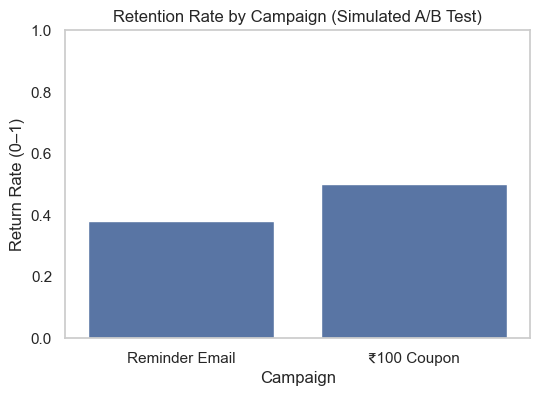

In [4]:

## 6. Visual Comparison
plt.figure(figsize=(6, 4))
sns.barplot(data=ab_df, x="Campaign", y="Returned", ci=None)
plt.title("Retention Rate by Campaign (Simulated A/B Test)")
plt.ylabel("Return Rate (0–1)")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.show()
